In [15]:
import pandas as pd


In [27]:
data = pd.read_csv('Earthquakes_database.csv')

In [28]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [29]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [30]:
# Check for missing values in the 'Date' column
missing_dates = data['Date'].isnull()

In [31]:
# Split the 'Date' column into 'Year', 'Month', and 'Day' (if the date format is 'm/d/yyyy')
data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand=True)

# Convert to numeric values, handling missing values by setting them to NaN
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Month'] = pd.to_numeric(data['Month'], errors='coerce')
data['Day'] = pd.to_numeric(data['Day'], errors='coerce')

# Drop rows with missing values in the 'Date' components (if needed)
data = data.dropna(subset=['Year', 'Month', 'Day'])

# Convert 'Year', 'Month', 'Day' columns to integers
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Day'] = data['Day'].astype(int)

# Drop the original 'Date' column if needed
data.drop(columns=['Date'], inplace=True)

data.to_csv('Earthquakes_database.csv', index=False)

In [32]:
magnitude_bins = [0, 3, 5, float('inf')]  # Define the bins for low, medium, and high magnitude
magnitude_labels = ['Low Magnitude', 'Medium Magnitude', 'High Magnitude']

# Add a new column 'Magnitude_Category'
data['Magnitude_Category'] = pd.cut(data['Magnitude'], bins=magnitude_bins, labels=magnitude_labels, include_lowest=True)

data.to_csv('Earthquakes_database.csv', index=False) 

In [33]:
columns_to_melt = ['Magnitude', 'Magnitude Type']

# Using melt to reshape the data
melted_data = pd.melt(data, id_vars=data.columns.difference(columns_to_melt), value_vars=columns_to_melt, var_name='Magnitude_Info', value_name='Magnitude_Value')

print(melted_data.head())

   Azimuthal Gap  Day  Depth  Depth Error  Depth Seismic Stations  \
0            NaN    2  131.6          NaN                     NaN   
1            NaN    4   80.0          NaN                     NaN   
2            NaN    5   20.0          NaN                     NaN   
3            NaN    8   15.0          NaN                     NaN   
4            NaN    9   15.0          NaN                     NaN   

   Horizontal Distance  Horizontal Error            ID  Latitude  \
0                  NaN               NaN  ISCGEM860706    19.246   
1                  NaN               NaN  ISCGEM860737     1.863   
2                  NaN               NaN  ISCGEM860762   -20.579   
3                  NaN               NaN  ISCGEM860856   -59.076   
4                  NaN               NaN  ISCGEM860890    11.938   

  Location Source  ...  Magnitude_Category  Month  Root Mean Square  Source  \
0          ISCGEM  ...      High Magnitude      1               NaN  ISCGEM   
1          ISCGEM 

In [34]:
pivot_table_data = pd.pivot_table(data, values='Type', index='Magnitude', aggfunc='count')

print(pivot_table_data)

           Type
Magnitude      
5.50       4685
5.51          1
5.52          4
5.53          1
5.54          1
...         ...
8.40          2
8.60          2
8.70          1
8.80          1
9.10          2

[64 rows x 1 columns]


In [38]:
import matplotlib.pyplot as plt

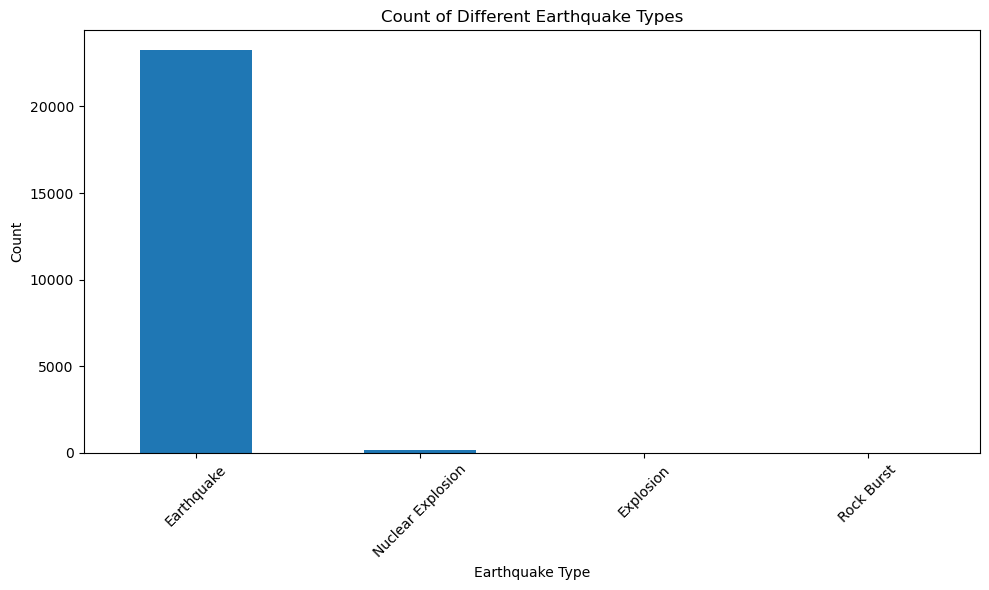

In [39]:
plt.figure(figsize=(10, 6))
data['Type'].value_counts().plot(kind='bar')
plt.title('Count of Different Earthquake Types')
plt.xlabel('Earthquake Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

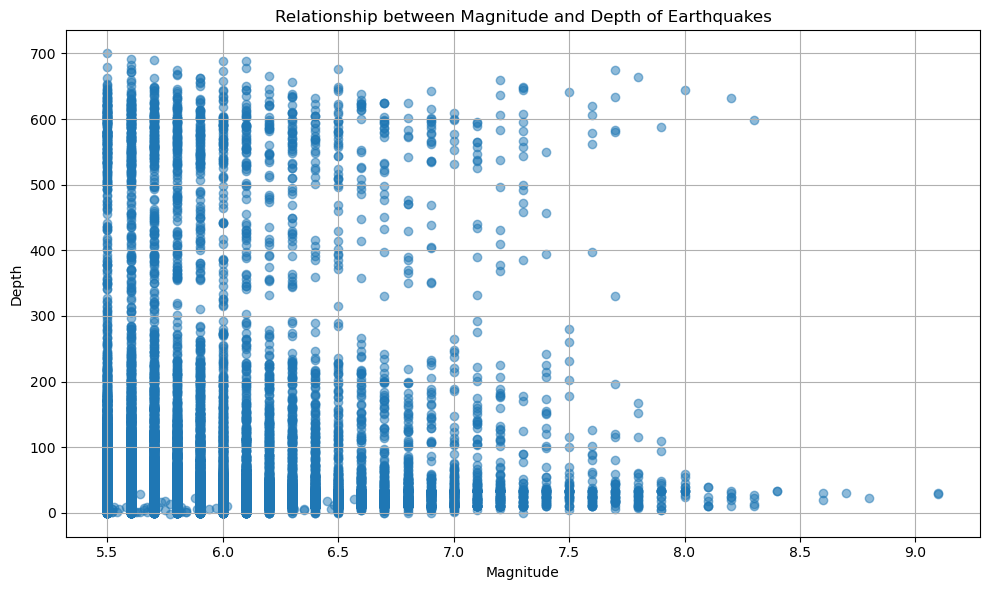

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Magnitude'], data['Depth'], alpha=0.5)
plt.title('Relationship between Magnitude and Depth of Earthquakes')
plt.xlabel('Magnitude')
plt.ylabel('Depth')
plt.grid(True)
plt.tight_layout()
plt.show()

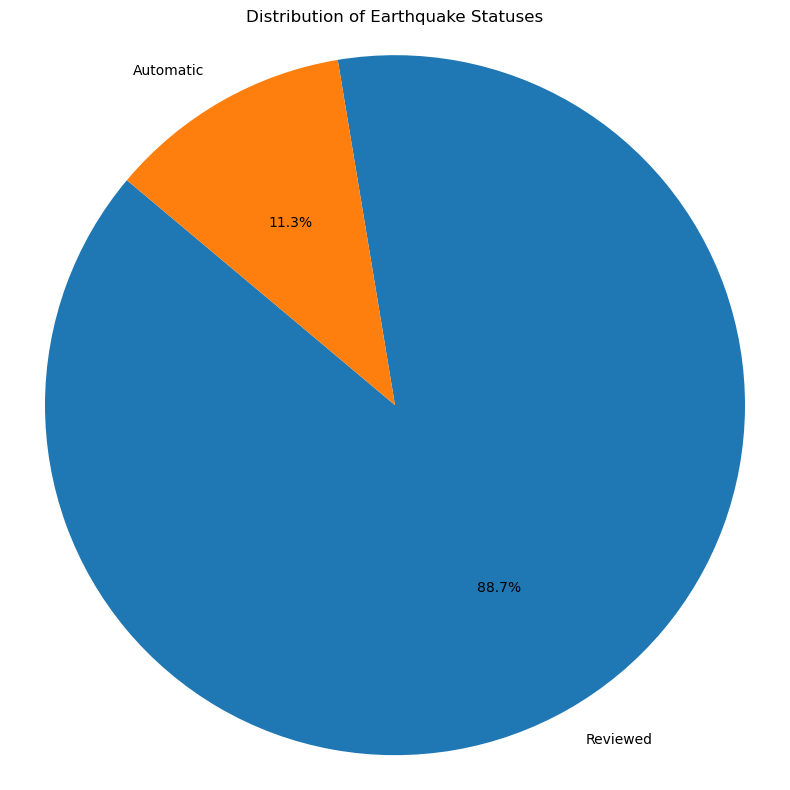

In [41]:
plt.figure(figsize=(8, 8))
status_counts = data['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Earthquake Statuses')
plt.axis('equal')
plt.tight_layout()
plt.show()

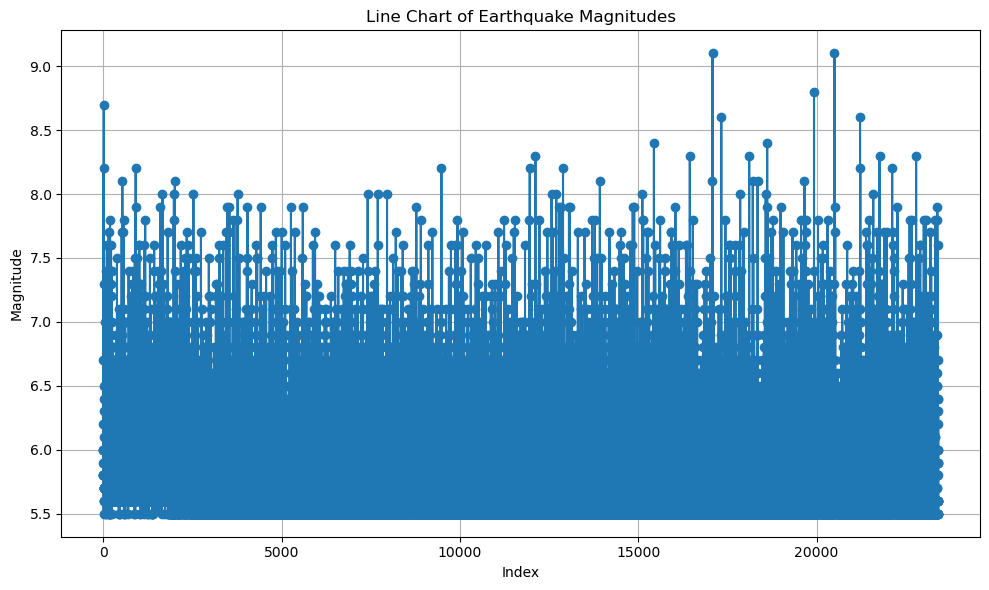

In [42]:
import numpy as np

index = np.arange(len(data))

# Creating a line chart for earthquake magnitudes using the arbitrary index
plt.figure(figsize=(10, 6))
plt.plot(index, data['Magnitude'], marker='o', linestyle='-')
plt.title('Line Chart of Earthquake Magnitudes')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

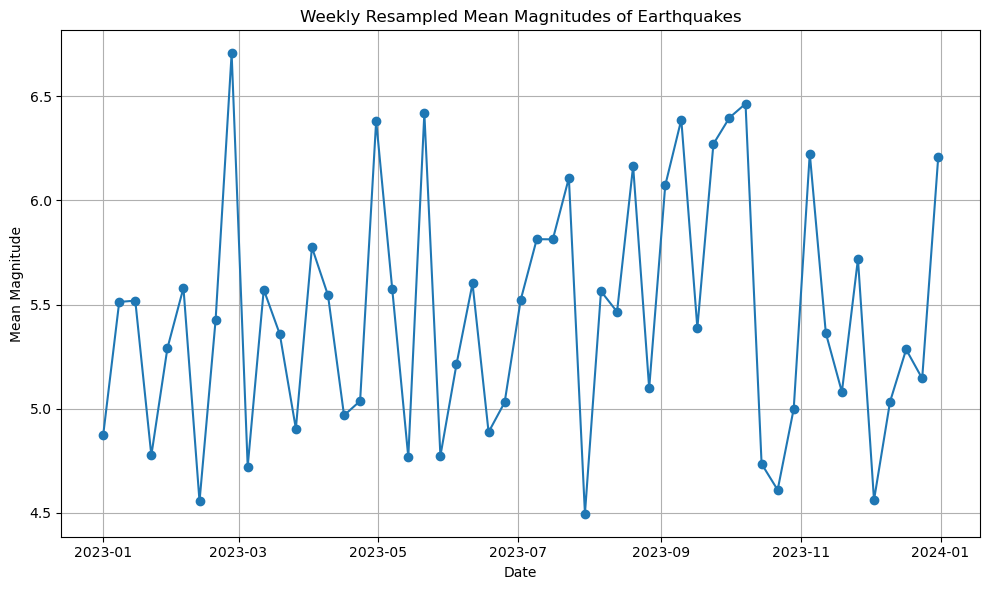

In [48]:
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
data = pd.DataFrame({
    'Magnitude': np.random.uniform(low=3.0, high=8.0, size=len(date_range))
}, index=date_range)

weekly_data = data.resample('W').mean()

# Plotting the resampled data
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['Magnitude'], marker='o', linestyle='-')
plt.title('Weekly Resampled Mean Magnitudes of Earthquakes')
plt.xlabel('Date')
plt.ylabel('Mean Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()